## Project # 3: Movie Prediction System

#### Importing Modules and necessary libraries

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#Import svm model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#### Reading User File

In [2]:
# read the rating csv file
rating_file=pd.read_csv('file.tsv' , sep='\t' , names=['user_id', 'movieId', 'rating', 'timestamp'])
rating_file

,user_id,movieId,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


#### Reading Movies Files

In [3]:
title_file=pd.read_csv('movies.csv')
print(title_file)

       movieId                                title  \
0            1                     Toy Story (1995)   
1            2                       Jumanji (1995)   
2            3              Grumpier Old Men (1995)   
3            4             Waiting to Exhale (1995)   
4            5   Father of the Bride Part II (1995)   
...        ...                                  ...   
10324   146684        Cosmic Scrat-tastrophe (2015)   
10325   146878           Le Grand Restaurant (1966)   
10326   148238       A Very Murray Christmas (2015)   
10327   148626                 The Big Short (2015)   
10328   149532  Marco Polo: One Hundred Eyes (2015)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                  

#### Merging two Files

In [54]:
# merge read the csv file
movie_dataset=pd.merge(title_file , rating_file , on='movieId')
movie_dataset.tail()


,movieId,title,genres,user_id,rating,timestamp
84238,1676,Starship Troopers (1997),Action|Sci-Fi,851,2,875731674
84239,1678,"Joy Luck Club, The (1993)",Drama|Romance,863,1,889289570
84240,1680,Sliding Doors (1998),Drama|Romance,863,2,889289570
84241,1681,Mortal Kombat: Annihilation (1997),Action|Adventure|Fantasy,896,3,887160722
84242,1682,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi,916,3,880845755


### Data Cleaning and Preprocessing

In [34]:
movie_dataset.shape

(84243, 6)

In [35]:
movie_dataset.isnull().sum()

movieId      0
title        0
genres       0
user_id      0
rating       0
timestamp    0
dtype: int64

In [36]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84243 entries, 0 to 84242
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movieId    84243 non-null  int64 
 1   title      84243 non-null  object
 2   genres     84243 non-null  object
 3   user_id    84243 non-null  int64 
 4   rating     84243 non-null  int64 
 5   timestamp  84243 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.9+ MB


#### Added Heatmap to check null values

<Axes: >

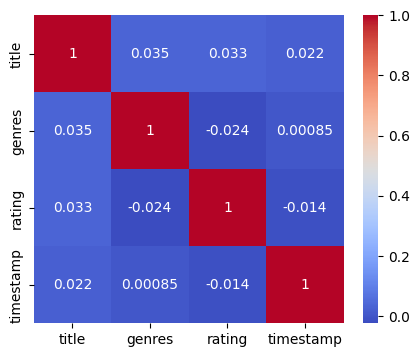

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
columns = movie_dataset.select_dtypes(include=np.number)
corr= columns.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

#### Checking for values in each column

In [71]:
movie_dataset['rating'].value_counts()

rating
4    29147
3    22581
5    18146
2     9395
1     4974
Name: count, dtype: int64

#### Creating histogram for each column

<Axes: >

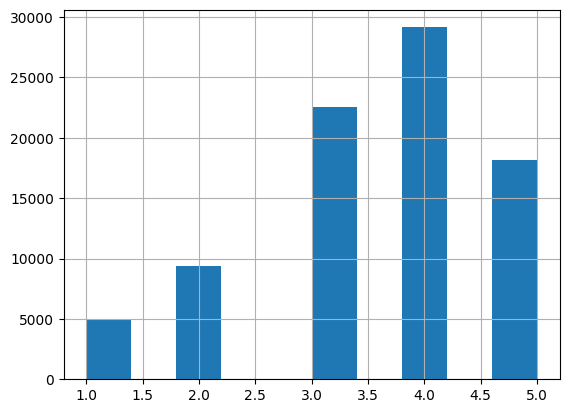

In [72]:
movie_dataset['rating'].hist()

<Axes: >

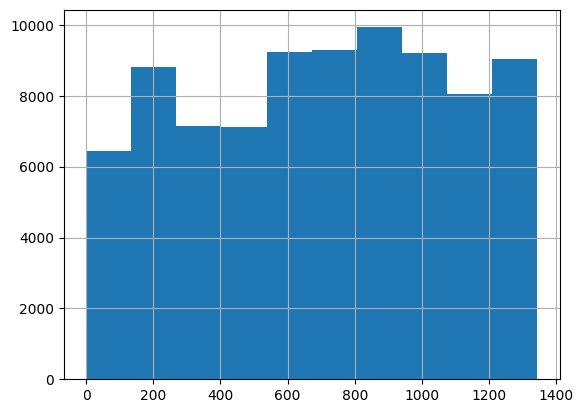

In [73]:
movie_dataset['title'].hist()

<Axes: >

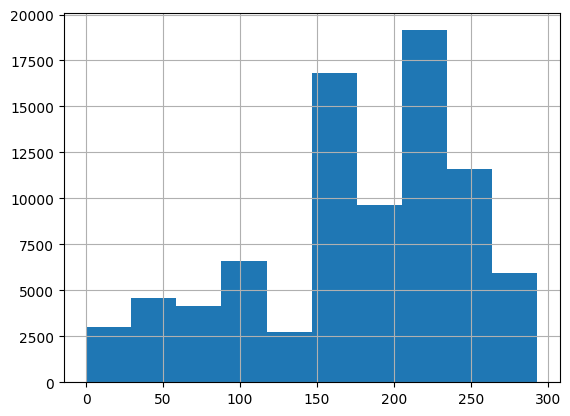

In [74]:
movie_dataset['genres'].hist() 

In [40]:
for x in movie_dataset['genres']:
  if x == '(no genres listed)' :
    movie_dataset['genres']=movie_dataset['genres'].replace(x , np.nan)

print(movie_dataset)

       movieId                               title  \
0            1                    Toy Story (1995)   
1            1                    Toy Story (1995)   
2            1                    Toy Story (1995)   
3            1                    Toy Story (1995)   
4            1                    Toy Story (1995)   
...        ...                                 ...   
84238     1676            Starship Troopers (1997)   
84239     1678           Joy Luck Club, The (1993)   
84240     1680                Sliding Doors (1998)   
84241     1681  Mortal Kombat: Annihilation (1997)   
84242     1682             Truman Show, The (1998)   

                                            genres  user_id  rating  timestamp  
0      Adventure|Animation|Children|Comedy|Fantasy      308       4  887736532  
1      Adventure|Animation|Children|Comedy|Fantasy      287       5  875334088  
2      Adventure|Animation|Children|Comedy|Fantasy      148       4  877019411  
3      Adventure|Animation|

#### Dropping Null Values

In [55]:
movie_dataset=movie_dataset.dropna()

In [56]:
movie_dataset.shape

(84243, 6)

#### Removing Unnecessary Columns

In [57]:
movie_dataset=movie_dataset.drop(columns=['movieId' , 'user_id'] , axis=1)
movie_dataset.head()

,title,genres,rating,timestamp
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,887736532
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,875334088
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,877019411
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,891700426
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,883601324


In [58]:
movie_dataset['genres']=le.fit_transform(movie_dataset['genres'])
movie_dataset['title']=le.fit_transform(movie_dataset['title'])

#### Creating Input and Output Data

In [25]:
x=movie_dataset.drop(columns=['rating'] , axis=1)
y=movie_dataset['rating']

In [26]:
x=np.array(x)
y=np.array(y)

#### Data Splitting

In [27]:
xtrain , xtest , ytrain , ytest=train_test_split(x , y , test_size=0.25)

# Model Building

### Logistic Regression

In [62]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [63]:
score=model.score(xtrain, ytrain)
print(score)

0.3451141147795258


### KNeighborsClassifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
prediction=model.predict(xtest)
print(prediction)
print('Accuracy of Model is: ', model.score(xtest, ytest)*100)

[4 2 5 ... 5 3 4]
Accuracy of Model is:  36.346802146146906


### DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
print('Accuracy of Model is: ', model.score(xtest,ytest)*100)

Accuracy of Model is:  30.01756801671336
